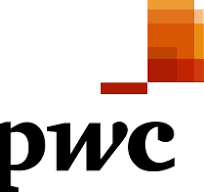

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

# 1. Import the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KHÓA DA/Project 2 - Du Le/02 Churn-Dataset.xlsx')
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


# 2. Data preparation & Cleaning

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [ ]:
customer_data = customer_data.drop_duplicates(keep='first')

In [ ]:
# Drop columns
customer_data = customer_data.drop(['customerID'], axis=1)

In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')
# Fill NaN values in 'TotalCharges' (you might want to choose a more appropriate strategy)
customer_data['TotalCharges'] = customer_data['TotalCharges'].fillna(0)

# 3. Exploratory Data Analysis

In [ ]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.515689,0.419566
std,0.368612,24.559481,30.090047,2266.794470,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


In [ ]:
customer_data.shape

(7043, 22)

# 4. Churn Analysis (Customer demographic analysis)

**a. Churn Percentage**

In [ ]:
# Count the number of churned customers
churn_customer = customer_data[customer_data['Churn'] == 'Yes']
churn_count = len(churn_customer)

# Calculate the percentage of churned customers
churn_percentage = (churn_count / len(customer_data)) * 100

print(f"Number of churned customers: {churn_count}")
print(f"Percentage of churned customers: {churn_percentage:.2f}%")


Number of churned customers: 1869
Percentage of churned customers: 26.54%


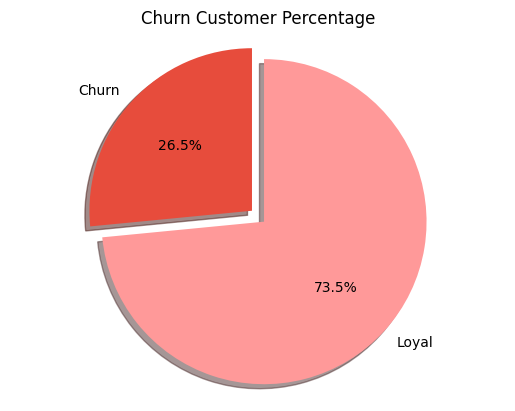

In [ ]:
labels = ['Churn', 'Loyal']
sizes = [churn_percentage, 100 - churn_percentage]
explode = (0.1, 0)
colors = ['#E74C3C', '#FF9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')

plt.title('Churn Customer Percentage')
plt.show()


**b. Customer Segments**

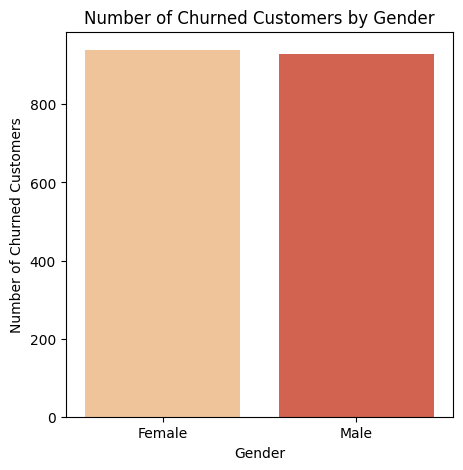

In [ ]:
# Count the number of churned customers by gender
churn_by_gender = churn_customer.groupby('gender')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values, hue = churn_by_gender.index, palette="OrRd", legend=False)
plt.title('Number of Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.show()


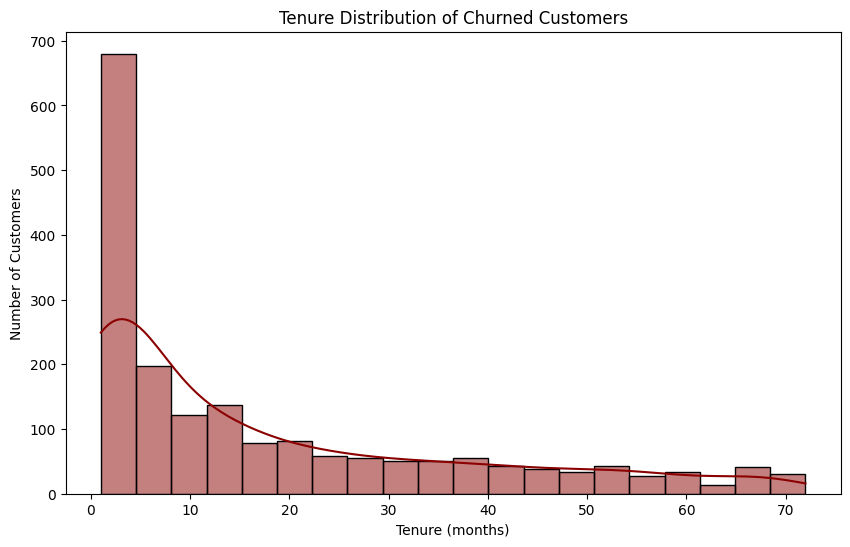

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_customer['tenure'], bins=20, kde=True, color='#8B0000')
plt.title('Tenure Distribution of Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-17-2c84c3c02070>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = customer_data.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() *100


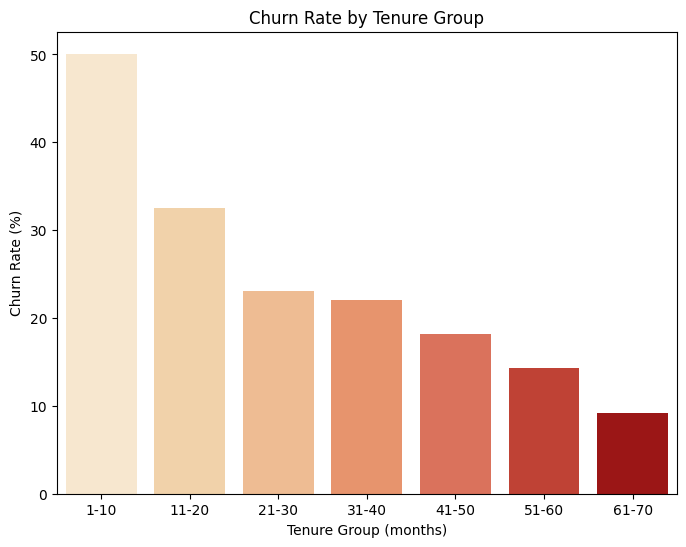

In [ ]:
# Create tenure groups
bins = [1, 10, 20, 30, 40, 50, 60, 70]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
customer_data['tenure_group'] = pd.cut(customer_data['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate for each tenure group
churn_rates = customer_data.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() *100
churn_rates = churn_rates['Yes'] # Select only the churn rate for 'Yes'

# Create the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, hue = churn_rates.index, palette="OrRd", legend=False)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (months)')
plt.ylabel('Churn Rate (%)')
plt.show()


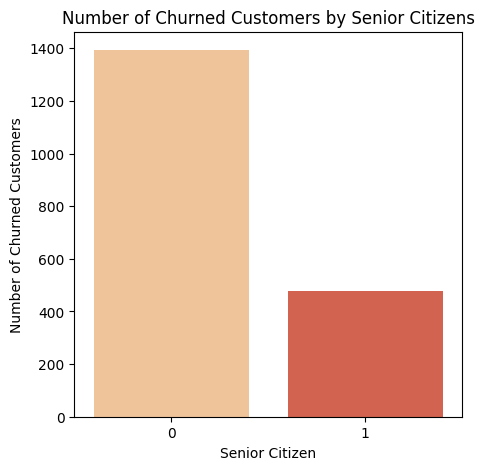

In [ ]:
# Count the number of churned customers by gender
churn_by_senior_citizens = churn_customer.groupby('SeniorCitizen')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_senior_citizens.index, y=churn_by_senior_citizens.values, hue=churn_by_senior_citizens.index, palette='OrRd', legend=False)
plt.title('Number of Churned Customers by Senior Citizens')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Churned Customers')
plt.show()

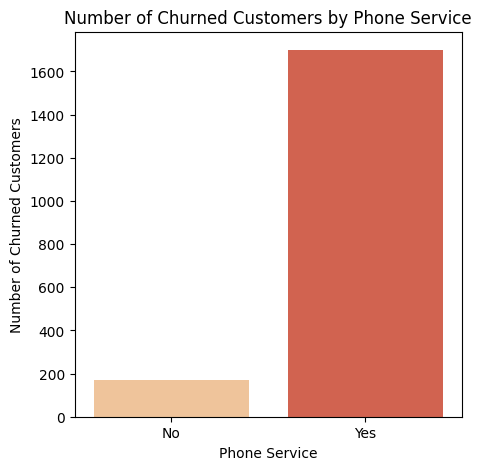

In [ ]:
# Count the number of churned customers by gender
churn_by_phoneservice = churn_customer.groupby('PhoneService')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_phoneservice.index, y=churn_by_phoneservice.values, hue=churn_by_phoneservice.index, palette='OrRd', legend=False)
plt.title('Number of Churned Customers by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Number of Churned Customers')
plt.show()

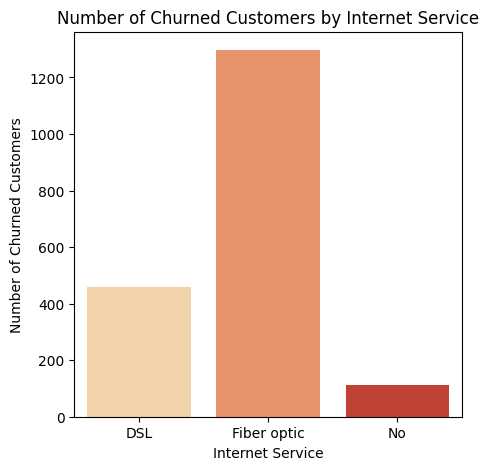

In [ ]:
# Count the number of churned customers by gender
churn_by_internetservice = churn_customer.groupby('InternetService')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_internetservice.index, y=churn_by_internetservice.values, hue=churn_by_internetservice.index, palette="OrRd", legend=False)
plt.title('Number of Churned Customers by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Number of Churned Customers')
plt.show()

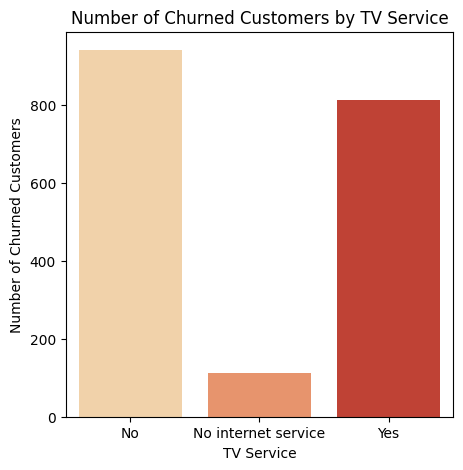

In [ ]:
# Count the number of churned customers by gender
churn_by_streamingTV = churn_customer.groupby('StreamingTV')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_streamingTV.index, y=churn_by_streamingTV.values, hue=churn_by_streamingTV.index, palette='OrRd', legend=False)
plt.title('Number of Churned Customers by TV Service')
plt.xlabel('TV Service')
plt.ylabel('Number of Churned Customers')
plt.show()

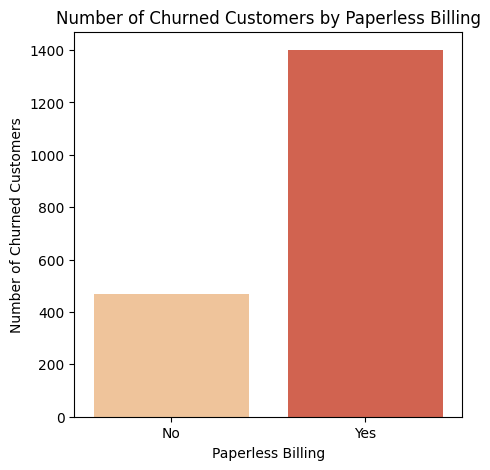

In [ ]:
# Count the number of churned customers by gender
churn_by_paperless_billing = churn_customer.groupby('PaperlessBilling')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_paperless_billing.index, y=churn_by_paperless_billing.values, hue=churn_by_paperless_billing.index, palette='OrRd', legend=False)
plt.title('Number of Churned Customers by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Number of Churned Customers')
plt.show()

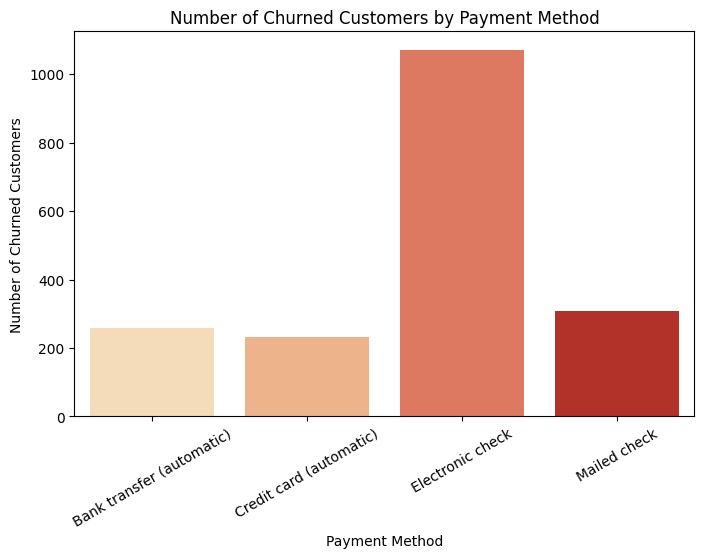

In [ ]:
# Count the number of churned customers by gender
churn_by_payment_method = churn_customer.groupby('PaymentMethod')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method.values, hue=churn_by_payment_method.index, palette='OrRd', legend=False)
plt.title('Number of Churned Customers by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=30)
plt.show()

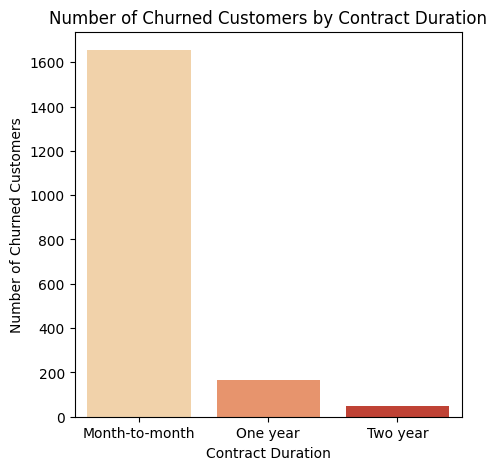

In [ ]:
# Count the number of churned customers by gender
churn_by_contract = churn_customer.groupby('Contract')['Churn'].count()

# Create the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, hue=churn_by_contract.index, palette='OrRd', legend=False)
plt.title('Number of Churned Customers by Contract Duration')
plt.xlabel('Contract Duration')
plt.ylabel('Number of Churned Customers')
plt.show()

# 5. Feature Engineering

In [ ]:
# Extract numeric data
churn_numeric_data = customer_data[['tenure','MonthlyCharges', 'numTechTickets']]

# Getting dummies of categorized variables
contract_dummies = pd.get_dummies(customer_data['Contract'], prefix='Contract')
payment_dummies = pd.get_dummies(customer_data['PaymentMethod'], prefix='PaymentMethod')
paperless_billing_dummies = pd.get_dummies(customer_data['PaperlessBilling'], prefix='PaperlessBilling')
churn_dummies = pd.get_dummies(customer_data['Churn'], prefix='Churn')
gender_dummies = pd.get_dummies(customer_data['gender'], prefix='Gender')

# Combine data
churn_customer_factors = pd.concat([payment_dummies, contract_dummies, paperless_billing_dummies, churn_dummies, gender_dummies, churn_numeric_data], axis=1)

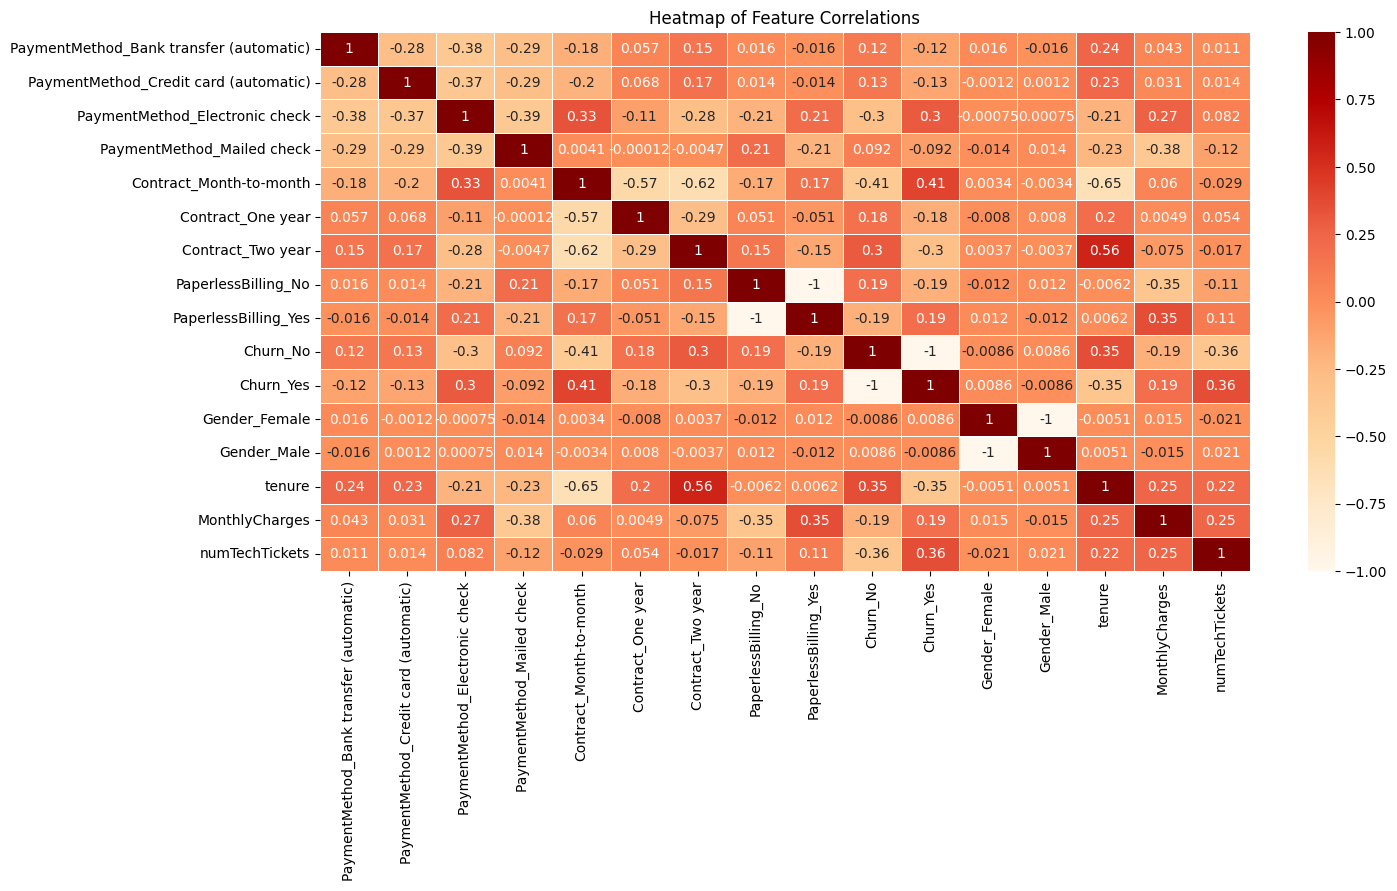

In [ ]:
# Calculate correlation of variables
corr_matrix = churn_customer_factors.corr()

# Build heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd', linewidths=0.5)

plt.title("Heatmap of Feature Correlations")
plt.show()


# 6. Modelling


## **Logistic Regression**

In [ ]:
# Encoding data
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ["Churn", "Contract", "PaymentMethod", "PaperlessBilling"]
encoded_cols = customer_data[cols_to_encode].apply(lambda col: LabelEncoder().fit_transform(col))
encoded_cols.columns = cols_to_encode
churn_customer_factors_1 = pd.concat([encoded_cols, churn_numeric_data], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = churn_customer_factors_1.drop(columns=['Churn'], axis=1)
y = churn_customer_factors_1['Churn']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

# Make predictions
y_pred = log_model.predict(x_test)

# Evaluate model
log_model_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {log_model_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.8509
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1539
           1       0.74      0.70      0.72       574

    accuracy                           0.85      2113
   macro avg       0.81      0.80      0.81      2113
weighted avg       0.85      0.85      0.85      2113

Confusion Matrix:
 [[1399  140]
 [ 175  399]]


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')
print('Decision Tree Classification Report:\n', classification_report(y_test, y_pred_dt))
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8126
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1539
           1       0.65      0.66      0.66       574

    accuracy                           0.81      2113
   macro avg       0.76      0.77      0.76      2113
weighted avg       0.81      0.81      0.81      2113

Decision Tree Confusion Matrix:
 [[1336  203]
 [ 193  381]]


## **XG Boost**

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))
print('XGBoost Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8471
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1539
           1       0.72      0.72      0.72       574

    accuracy                           0.85      2113
   macro avg       0.81      0.81      0.81      2113
weighted avg       0.85      0.85      0.85      2113

XGBoost Confusion Matrix:
 [[1378  161]
 [ 162  412]]


# 7. Model Evaluation

## **Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

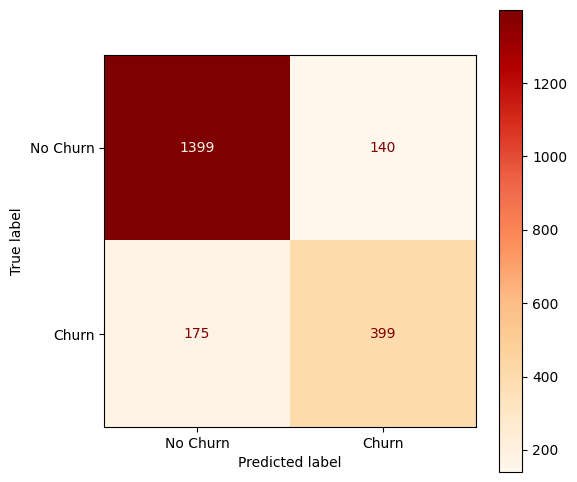

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ["No Churn", "Churn"]
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()
display.plot(ax=ax, cmap="OrRd")
plt.show()

## **Decision Tree**

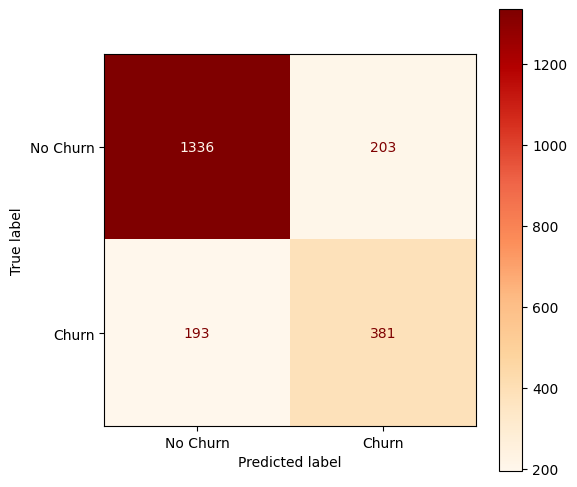

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = ["No Churn", "Churn"]
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()
display.plot(ax=ax, cmap="OrRd")
plt.show()

## **XG Boost**

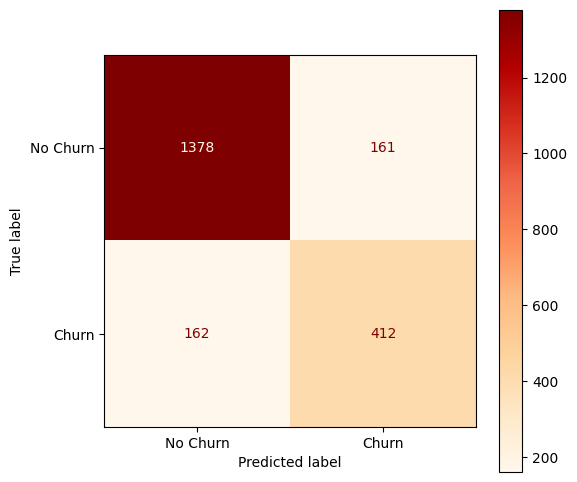

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
labels = ["No Churn", "Churn"]
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()
display.plot(ax=ax, cmap="OrRd")
plt.show()